# This notebook demonstrates how you can use Python and data science techniques in finance to make more informed decisions.

In this notebook, you will learn various financial concepts and how to apply them to achieve the best outcomes. To make the best stock selection, I have used data from 2,000 companies listed on the NSE (National Stock Exchange). Additionally, I am providing a link where you can download this data and run the notebook on your local machine.

As we progress through this highly useful notebook, I will explain each concept used for optimization and provide additional resources to enhance your knowledge of finance whenever necessary. Please check out every link if you feel my explanations are not sufficient for your understanding.

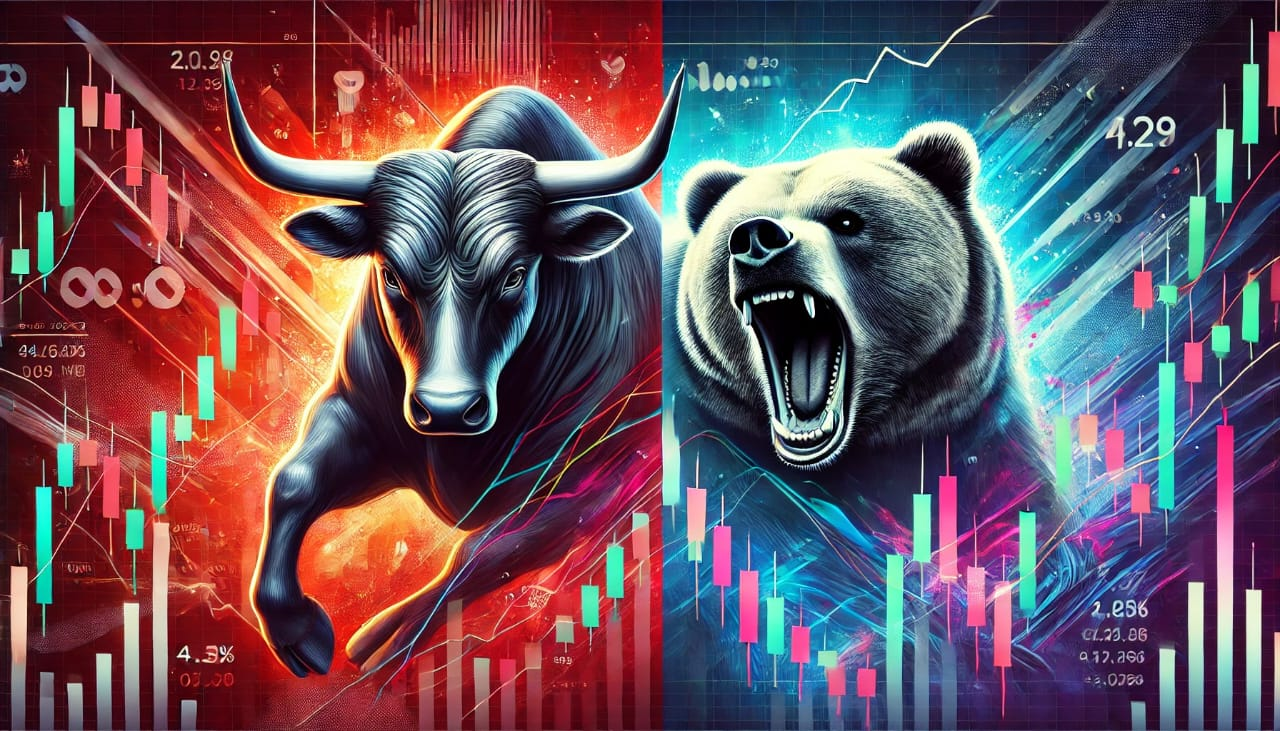

In [31]:
from IPython.display import Image
Image('stock_chart_.jpeg')

## Link to Download the data
https://drive.google.com/file/d/1wqnzUG-eJy6Lt1AFnIdUDL9KP7KJUr_f/view

In [1]:
import pandas as pd #some libraries that i am gonna use 
import numpy as np
import scipy.optimize as sc
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
Source_Path = r'C:\Users\hp\Desktop\my_Trad'   # Make a new foder and keep the path here and indside it keep the downloaded csv file                       

In [3]:
# stocks_data.to_csv(rf'{Source_Path}/data/stocks_data.csv')
stocks_data = pd.read_csv(rf'{Source_Path}/stocks_data.csv')

In [4]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
stocks_data.set_index('Date', inplace=True)
stock_closing_data  =stocks_data['2023-01-01':'2023-12-31']   #for analysis
data_now  =stocks_data['2024-01-30':'2024-02-05']  # for validation


## "I am not using recent data because it is highly influenced by the market crash. The purpose of this notebook is to demonstrate optimization under normal conditions."

## We will analyze the data for several months, then buy the recommended stocks and hold them for one month.

In [5]:
sensex = pd.read_csv(rf'{Source_Path}\SENSEX_23.csv', parse_dates=['Date'], index_col='Date')
sensex['2023-07-07':'2024-07-30']  # I am selecting 6 months data for analysis from '7th feb 2024' to '30 jun 2024'
                                   

,Open,High,Low,Close
Date,,,,
2023-07-07,65559.41,65898.98,65175.74,65280.45
2023-07-10,65482.33,65633.49,65246.40,65344.17
2023-07-11,65598.65,65870.59,65517.57,65617.84
2023-07-12,65759.28,65811.64,65320.25,65393.90
2023-07-13,65667.07,66064.21,65452.15,65558.89
...,...,...,...,...
2023-12-22,71045.65,71259.55,70713.56,71106.96
2023-12-26,71097.78,71471.29,71012.08,71336.80
2023-12-27,71492.02,72119.85,71473.65,72038.43


## Here i am calulating beta it is use to understand the volatility of a stock with valatality of market(SENSEX)
Example if market is up  by  2% how uch a perticuler stock will be effected.

How i do calculate it ?

by windowing method (dividing data into size 10) for each 10 days i am calulating slop of sunsex and stock ( can be easily done by using sklearn linear regression)

In [6]:
# sensex = pd.read_csv(rf'{Source_Path}\TATAMOTORS.csv', parse_dates=['Date'], index_col='Date')['2024-02-07':'2024-07-30']
sensex = sensex['Close'].pct_change().dropna()

def calculate_Beta(returns_stock, returns_market):
    """This function wil take returns of a perticuler asset and market and find the average slope between them."""
    
    X = np.array(returns_market).reshape(-1, 1)
    y = np.array(returns_stock)
    
    betas = np.zeros(len(y) - 10)
    lr = LinearRegression()
    
    for i in range(len(y) - 10):
        lr.fit(X[i:i+10], y[i:i+10])
        betas[i] = lr.coef_[0]
    return np.median(betas)
len(sensex)

245

## Now, in the above function, you can see that I am using stock returns and market returns over a given time period. So, how do we calculate them?

Let's take an example:

Suppose the stock price of Zomato is ₹100 at the start of the month, and by the end of the month, the closing price is ₹110. The return would be ₹10, which is a 10% gain on the investment.

Below is the formula to calculate it:


In [8]:
current_value=110
value_invesed =100
(current_value-value_invesed)/value_invesed*100

10.0

## The good part is that we don’t need to do this manually! Pandas provides a built-in function that can do the work for us. That's amazing, right?

## And the best part is that it provides almost normalized values. That’s where we feel happy as data science enthusiasts!

In [9]:
TATAMOTORS = stock_closing_data['TATAMOTORS']['2023-01-01':'2023-12-31']
TATAMOTORS = TATAMOTORS.pct_change().dropna()
TATAMOTORS

Date
2023-01-03   -0.002280
2023-01-04   -0.021071
2023-01-05    0.003371
2023-01-06   -0.012665
2023-01-09    0.019503
                ...   
2023-12-22    0.022360
2023-12-26   -0.007106
2023-12-27    0.029671
2023-12-28    0.017546
2023-12-29    0.034554
Name: TATAMOTORS, Length: 244, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

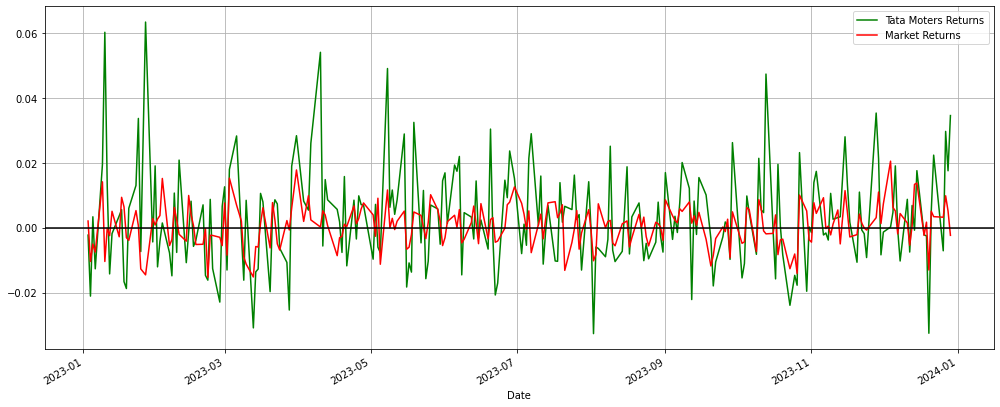

In [10]:
plt.figure(figsize=(17,7))
TATAMOTORS.plot(label='Tata Moters Returns',color='g')
sensex.plot(label='Market Returns',color='r')
plt.grid()
plt.axhline([0],color='k')
plt.legend()

# What Does the Above Beautiful Graph Explain to You?
The Sensex and Tata Motors are mostly providing similar returns, meaning they move in the same direction. This indicates that Tata Motors has a high beta with the market.

Based on this, you can build models that predict how much a particular stock will rise or fall in percentage terms when the market moves up or down by a certain percentage.

# Is This the Only Parameter You Should Consider?
No.

# What's next?
Let's analyze this distribution, which appears close to a Gaussian distribution. What should we expect?

We'll examine the following aspects one by one:

Standard Deviation of Stock Returns

        Measures the spread of returns on both the positive and negative sides.
        Lower standard deviation is generally preferred for stable investments, while higher standard deviation may 
        be acceptable for high-risk, high-reward trading strategies.
        
        
Kurtosis

        Indicates how much risk is associated with the stock or asset.
        Higher kurtosis suggests the presence of extreme values (large gains or losses).
        A moderate kurtosis (close to 3, which is the normal distribution) is generally preferred because excessively 
        high kurtosis means higher tail risk.
        
        
Skewness of Stock Returns

        Measures the asymmetry of returns.
        A positive skew is generally desirable, as it suggests a greater chance of extreme positive returns rather than 
        extreme losses. A negative skew means a higher probability of large losses, which is riskier for investors.


In [11]:
Technicals = {}  # this block of code calculates all the paremeters at one go
# stock_closing_data
skip = []
for i in stock_closing_data.columns:
    returns = stock_closing_data[i].pct_change().dropna()

    if len(returns) == 244 and returns.index[-1] == pd.Timestamp('2023-12-29'):
        beta=calculate_Beta(returns, sensex)
        
        std =returns.std()
        skew = returns.skew()
        kurtosis = returns.kurt()
        Technicals[i] = [beta,std,skew,kurtosis]
    else:
        skip.append(i)

In [12]:
len(Technicals)

1543

## Lets make a good looking DataFrame for our Data

In [13]:
Technicals_data = pd.DataFrame.from_dict(Technicals, orient='index', columns=['Beta', 'Std Dev', 'Skewness', 'Kurtosis'])
Technicals_data = Technicals_data.round(4)  
Technicals_data.index.name = "Company"
# Fundamental_data.reset_index(inplace=True) 
Technicals_data

,Beta,Std Dev,Skewness,Kurtosis
Company,,,,
20MICRONS,0.5721,0.0266,0.7196,2.6636
360ONE,0.5227,0.0189,0.5471,1.5534
3IINFOLTD,0.5476,0.0312,2.4676,12.8193
3MINDIA,0.1821,0.0192,2.5731,16.9401
5PAISA,0.8031,0.0242,2.1465,9.1768
...,...,...,...,...
ZOTA,0.6566,0.0262,0.9673,2.3848
ZUARI,1.1611,0.0267,1.5739,7.5869
ZUARIIND,0.5751,0.0265,2.0366,14.0402


## The second previous code is a comppputationally havy and time consuming so save this first in case we need it anywhere.

In [14]:
Technicals_data.to_excel(rf'{Source_Path}\two_qyarter_analysis.xlsx',index=True)
Technicals_data = pd.read_excel(rf'{Source_Path}\two_qyarter_analysis.xlsx')
Technicals_data

,Company,Beta,Std Dev,Skewness,Kurtosis
0,20MICRONS,0.5721,0.0266,0.7196,2.6636
1,360ONE,0.5227,0.0189,0.5471,1.5534
2,3IINFOLTD,0.5476,0.0312,2.4676,12.8193
3,3MINDIA,0.1821,0.0192,2.5731,16.9401
4,5PAISA,0.8031,0.0242,2.1465,9.1768
...,...,...,...,...,...
1538,ZOTA,0.6566,0.0262,0.9673,2.3848
1539,ZUARI,1.1611,0.0267,1.5739,7.5869
1540,ZUARIIND,0.5751,0.0265,2.0366,14.0402
1541,ZYDUSLIFE,0.4242,0.0141,1.0361,4.5534


## Now, we are ready to shortlist some stocks based on our analysis for the portfolio.Before that, let me explain the criteria I will use to select the stocks.

## I Want:

Some stocks with a higher beta and some with the lowest beta.


High standard deviation, as high risk = high reward.


Low kurtosis, indicating fewer extreme price movements.


A high positive skew, suggesting a greater chance of extreme positive returns.


In [15]:
Beta_sorted = Technicals_data.sort_values(by='Beta',ascending=True).reset_index(drop=True)
Beta_headge_posive= Beta_sorted[:500].reset_index(drop=True) # top 500 highr with beta
Beta_headge_negative = Beta_sorted[-500:].reset_index(drop=True) #top 500 lower with beta

In [16]:
def get_optimise_companies(data):   # this code will do all thee sorting based on what i said above
    """ This Function takes cutomised data frame with values of  Std Dev,Skewness and Kurtosis and give the best
    stocks from criteria that i explained above.
    """
    
    top=int(np.floor(len(data)*0.7))
    Std_sorted = data.sort_values(by='Std Dev',ascending=False)[:top]
    Skewness_sorted=Std_sorted.sort_values(by='Skewness',ascending=False)[:int(np.floor(len(Std_sorted)*0.7))]
    Kurtosis_sorted=Skewness_sorted.sort_values(by='Kurtosis',ascending=True)[:int(np.floor(len(Skewness_sorted)*0.7))]
    
    return Kurtosis_sorted

In [17]:
top_best_stocks=pd.concat([get_optimise_companies(Beta_headge_posive),get_optimise_companies(Beta_headge_negative)]).reset_index(drop=True)
top_best_stocks

,Company,Beta,Std Dev,Skewness,Kurtosis
0,NAGREEKCAP,-0.4802,0.0361,0.7643,0.6363
1,MADHUCON,0.3265,0.0308,0.8648,0.7695
2,INSPIRISYS,0.1728,0.0305,0.8476,0.8777
3,NGIL,0.2959,0.0274,0.8250,1.3104
4,DCI,-0.0159,0.0295,0.8542,1.3843
...,...,...,...,...,...
335,HISARMETAL,0.7309,0.0366,1.8381,8.6377
336,SYNCOMF,0.9228,0.0373,2.3472,8.6511
337,COCHINSHIP,1.1944,0.0331,1.6865,8.7725
338,NAVKARCORP,0.9736,0.0323,1.5559,8.8001


# Now, we have some of the best stocks based on the analysis of the one year.
We need to select stocks that are currently at the best time to take a position. For this, we will use a stock indicator called RSI (Relative Strength Index).

You can learn more about it from the link below.
https://www.investopedia.com/articles/active-trading/042114/overbought-or-oversold-use-relative-strength-index-find-out.asp#toc-rsi-ranges

In [18]:
def calculate_rsi(data, period=14):
    """RSI indicatore"""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).ewm(span=period, adjust=False).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(span=period, adjust=False).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [19]:
rsi={}
for i in top_best_stocks['Company']:
    data =stock_closing_data[i] 
    r = calculate_rsi(data)
    rsi[i]=np.mean(r[-5:])    # taking the mean of last 5 days rsi
    

In [20]:
stocks =pd.Series(rsi).sort_values()   #sortng the Data based on rsi value (lower the value best time to take the position)
stocks.to_csv(rf'{Source_Path}\RSI_stocks_sorted_two_quarter.csv')  #save it so it can be used further withiout running th havy code

In [21]:
stocks.head

<bound method NDFrame.head of DCI           18.186321
MADHUCON      19.232217
CREDITACC     23.095904
JPOLYINVST    26.376902
WELSPUNLIV    27.135063
                ...    
MSTCLTD       84.932937
HINDCOPPER    86.475932
SURYAROSNI    88.575447
GALLANTT      92.169934
INOXWIND      92.545301
Length: 340, dtype: float64>

In [22]:
selected_stocks = stocks[0:20]    # taking top 20 stocks according to rsi
selected_stocks

DCI           18.186321
MADHUCON      19.232217
CREDITACC     23.095904
JPOLYINVST    26.376902
WELSPUNLIV    27.135063
JINDWORLD     28.457768
MAPMYINDIA    29.770507
ATULAUTO      30.965904
NECCLTD       31.562600
TI            32.621463
KEC           32.888673
OPTIEMUS      33.020578
ACLGATI       33.177987
TDPOWERSYS    33.212442
MOKSH         33.260633
TREJHARA      33.371850
THOMASCOOK    33.623508
INDIANHUME    34.200287
CAREERP       34.377458
DBREALTY      34.700906
dtype: float64

## Now we have some stocks but we don't know which stock we should buy how much so if our aim to put 100% mony in our stock portfoilio then there is a way.

## I know this might feel overwhelming—trust me, I’ve been there! But let’s be real, explaining all of portfolio management here would take ages (and probably turn this notebook into a novel). So, instead of that, I’m sharing a fantastic link below that breaks it down beautifully. Go ahead, give it a read, and once you’ve absorbed all that wisdom, come back and let’s dive into this notebook!

https://github.com/quantopian/research_public/blob/master/notebooks/lectures/CAPM_and_Arbitrage_Pricing_Theory/notebook.ipynb


In [23]:
def Stocks_data(stocks):
    
    if type(stocks)!=pd.Series:
        stocks =pd.Series(index=selected_stocks)
    data={}
    da = stock_closing_data
    for i in stocks.index:
        d = da[rf'{i}'].pct_change().dropna()
        data[i]=d
    returns = pd.DataFrame(data) 
    mean_returns = returns.mean()
    cov_returns = returns.cov()
    return mean_returns,cov_returns

mean_returns,cov_returns=Stocks_data(selected_stocks)
w=np.random.rand(len(mean_returns))

In [24]:
def negative_s_r(w, mean_returns, cov_returns, risk_free_r=0):
    """This function is to calculate negative of sharpe ratio so we can use it as optimisation function and minimise it to get
    highest positive sharpi ratio"""
    daily_risk_free_r = (1 + risk_free_r)**(1/244) - 1    #
    
    # Calculate portfolio's daily excess return:
    portfolio_return = np.dot(w, mean_returns) - daily_risk_free_r
    w = np.array(w)
    portfolio_risk = np.sqrt(np.dot(w.T, np.dot(cov_returns, w)))
    
    # Avoid division by zero if risk is very low
    if portfolio_risk == 0:
        return np.inf
    # Negative Sharpe Ratio (to be minimized)
    return -(portfolio_return / portfolio_risk)


In [25]:
def portfolio_performence(w,mean_returns,cov_returns):
    """This function will calculate the return and risk of the portfolio"""
    returns= np.sum(mean_returns*w)*244    #
    std = np.sqrt(np.dot(w.T,np.dot(cov_returns,w)))* np.sqrt(244)   #
    return returns,std

def max_sharp_ratio(mean_returns, cov_returns, risk_free_r=0 ,constraintSet=(0,1)):
    """This function will calculate the maximum possible sharpi ratio for portfolio"""
    num_stocks=len(mean_returns)
    args = (mean_returns, cov_returns, risk_free_r)
    constraints = ({'type': 'eq','fun': lambda x: np.sum(x)-1 })
    bound = constraintSet
    bounds = tuple(bound for stock in range(num_stocks))
    results =sc.minimize(negative_s_r,num_stocks*[1/num_stocks],args=args, method='SLSQP',bounds=bounds,constraints=constraints)
    return results

In [26]:
selected_stocks.index

Index(['DCI', 'MADHUCON', 'CREDITACC', 'JPOLYINVST', 'WELSPUNLIV', 'JINDWORLD',
       'MAPMYINDIA', 'ATULAUTO', 'NECCLTD', 'TI', 'KEC', 'OPTIEMUS', 'ACLGATI',
       'TDPOWERSYS', 'MOKSH', 'TREJHARA', 'THOMASCOOK', 'INDIANHUME',
       'CAREERP', 'DBREALTY'],
      dtype='object')

In [27]:
mean_returns.shape

(20,)

In [28]:
allocations = np.round(max_sharp_ratio(mean_returns, cov_returns, risk_free_r=0.1)['x']*100,3)
allocations= pd.Series(allocations,index=selected_stocks.index)
allocations

DCI            5.537
MADHUCON       0.000
CREDITACC     14.698
JPOLYINVST     0.000
WELSPUNLIV     3.291
JINDWORLD      0.000
MAPMYINDIA    14.606
ATULAUTO       5.333
NECCLTD        0.000
TI             8.451
KEC            0.452
OPTIEMUS       0.000
ACLGATI        0.000
TDPOWERSYS    15.007
MOKSH          0.000
TREJHARA      14.441
THOMASCOOK     7.813
INDIANHUME     1.822
CAREERP        6.070
DBREALTY       2.479
dtype: float64

In [29]:
data_at_the_time_of_investment ={}
for i in allocations.index:
    da =stock_closing_data[i][-1]
    data_at_the_time_of_investment[i]=da
data_at_the_time_of_investment 

{'DCI': 176.35000610351562,
 'MADHUCON': 7.0,
 'CREDITACC': 1596.550048828125,
 'JPOLYINVST': 614.5999755859375,
 'WELSPUNLIV': 144.4499969482422,
 'JINDWORLD': 303.3999938964844,
 'MAPMYINDIA': 1945.199951171875,
 'ATULAUTO': 572.0999755859375,
 'NECCLTD': 28.64999961853028,
 'TI': 240.9499969482422,
 'KEC': 589.2000122070312,
 'OPTIEMUS': 310.3999938964844,
 'ACLGATI': 124.1500015258789,
 'TDPOWERSYS': 260.04998779296875,
 'MOKSH': 14.0,
 'TREJHARA': 180.0,
 'THOMASCOOK': 135.85000610351562,
 'INDIANHUME': 242.6999969482422,
 'CAREERP': 188.5500030517578,
 'DBREALTY': 185.6000061035156}

In [30]:
data_now_dict ={}
for i in allocations.index:
    da = data_now.loc['2024-01-30'][i]
    data_now_dict[i]=da
data_now_dict

{'DCI': 207.6000061035156,
 'MADHUCON': 11.25,
 'CREDITACC': 1559.550048828125,
 'JPOLYINVST': 705.7999877929688,
 'WELSPUNLIV': 152.8000030517578,
 'JINDWORLD': 278.95001220703125,
 'MAPMYINDIA': 1932.550048828125,
 'ATULAUTO': 583.3499755859375,
 'NECCLTD': 29.75,
 'TI': 237.1999969482422,
 'KEC': 628.75,
 'OPTIEMUS': 294.79998779296875,
 'ACLGATI': 124.4499969482422,
 'TDPOWERSYS': 291.8500061035156,
 'MOKSH': 17.0,
 'TREJHARA': 176.35000610351562,
 'THOMASCOOK': 183.75,
 'INDIANHUME': 244.6999969482422,
 'CAREERP': 258.04998779296875,
 'DBREALTY': 242.6999969482422}

In [31]:
def calculate_portfolio_return(data_at_the_time_of_investment,data_now):
    """This function will calculate performence of the porfolio for given time period and
    for given assets, ie how much percentage we got from this portfolio"""
    r = []
    for i in data_now_dict:
        r.append(((data_now_dict[i] - data_at_the_time_of_investment[i])/data_now_dict[i]))
    p_change=np.array(r)+1     #percentage droped or gained by each stock
    todays_portfolio =sum((allocations*1000)*p_change)   # if i have invested 100000 rupees
    loss_percent=(todays_portfolio-100000)/100000
    return loss_percent*100
calculate_portfolio_return(data_at_the_time_of_investment,data_now)

6.1725985159198755

Our return over the past month is an impressive 5.5%—amazing, right?! However, this can vary depending on different time periods and market conditions. On average, many investors expect around 3% monthly returns, though this number can fluctuate. You can experiment with this strategy across various time frames, and optimization can be done using data spanning over a year as well. Now, here’s the fun part—I didn’t include short selling in this project. Why? Well, short selling might work wonders in times like these, when the market is crashing, or even in normal conditions. But personally, I’m not a big fan of betting against the market. Call me old-fashioned, but I like to sleep at night! That said, combining long and short strategies could make sense if you’re into that sort of thing.

If you have any doubts, need recent data, or just want to debate market strategies, feel free to reach out to me on LinkedIn!
https://www.linkedin.com/in/shaukatshaikh7/